In [57]:
import pandas as pd
import numpy as np
from sklearn.cluster impy = np.array(train['Survived'])ort KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
train = pd.read_csv("Documents/datam.csv")
test = pd.read_csv("Documents/data.csv")

In [59]:
print("***** Train_Set *****")
print(train.head())
print("\n")
print("***** Test_Set *****")
print(test.head())

***** Train_Set *****
   Day  No Of Sessions  Accumulated Sessions  Unique Drivers  No. of Ports  \
0    1             1.0                     1               1            16   
1    2             2.0                     3               1            16   
2    3             3.0                     6               3            18   
3    4             6.0                    12               6            20   
4    5             2.0                    14               2            20   

   Energy(kWh)  Accumulated_Energy(MWh)  GHG_savings(kg)  \
0            7                     0.01              3.0   
1           18                     0.02              7.0   
2           11                     0.04              5.0   
3           50                     0.09             21.0   
4            3                     0.09              1.0   

   Accumulated GHG (kg)  Charge time (minutes)  Gasoline_Savings(gallons)  \
0                     3                    123                       0.

In [60]:
print("***** Train_Set *****")
print(train.describe())
print("\n")
print("***** Test_Set *****")
print(test.describe())

***** Train_Set *****
              Day  No Of Sessions  Accumulated Sessions  Unique Drivers  \
count  365.000000      364.000000            365.000000      365.000000   
mean   183.000000       18.813187           2858.849315       16.487671   
std    105.510663        8.705670           2069.940635        7.484635   
min      1.000000        1.000000              1.000000        1.000000   
25%     92.000000       13.000000            927.000000       11.000000   
50%    183.000000       18.000000           2691.000000       16.000000   
75%    274.000000       24.000000           4531.000000       21.000000   
max    365.000000       55.000000           7546.000000       47.000000   

       No. of Ports  Energy(kWh)  Accumulated_Energy(MWh)  GHG_savings(kg)  \
count    365.000000   365.000000               365.000000       364.000000   
mean      32.975342   130.621918                19.727589        55.184066   
std        5.130382    68.022900                14.469623        28.

In [61]:
print(train.columns.values)

['Day' 'No Of Sessions' 'Accumulated Sessions' 'Unique Drivers'
 'No. of Ports' 'Energy(kWh)' 'Accumulated_Energy(MWh)' 'GHG_savings(kg)'
 'Accumulated GHG (kg)' 'Charge time (minutes)'
 'Gasoline_Savings(gallons)' 'Charge Fee(in$)' 'Charge_Type'
 'Charge_demand']


In [62]:
train.isna().head()

,Day,No Of Sessions,Accumulated Sessions,Unique Drivers,No. of Ports,Energy(kWh),Accumulated_Energy(MWh),GHG_savings(kg),Accumulated GHG (kg),Charge time (minutes),Gasoline_Savings(gallons),Charge Fee(in$),Charge_Type,Charge_demand
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [63]:
print("*****In the train set*****")
print(train.isna().sum())
print("\n")
print("*****In the test set*****")
print(test.isna().sum())

*****In the train set*****
Day                          0
No Of Sessions               1
Accumulated Sessions         0
Unique Drivers               0
No. of Ports                 0
Energy(kWh)                  0
Accumulated_Energy(MWh)      0
GHG_savings(kg)              1
Accumulated GHG (kg)         0
Charge time (minutes)        0
Gasoline_Savings(gallons)    0
Charge Fee(in$)              0
Charge_Type                  0
Charge_demand                0
dtype: int64


*****In the test set*****
Date                         0
No Of Sessions               1
Accumulated Sessions         1
Unique Drivers               0
No. of Ports                 0
Energy(kWh)                  0
Accumulated_Energy(MWh)      0
GHG_savings(kg)              0
Accumulated GHG (kg)         0
Charge time (minutes)        0
Gasoline_Savings(gallons)    0
Charge Fee(in$)              1
Charge_Type                  0
Charge_demand                0
dtype: int64


In [64]:
test.isna().head()

,Date,No Of Sessions,Accumulated Sessions,Unique Drivers,No. of Ports,Energy(kWh),Accumulated_Energy(MWh),GHG_savings(kg),Accumulated GHG (kg),Charge time (minutes),Gasoline_Savings(gallons),Charge Fee(in$),Charge_Type,Charge_demand
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [65]:
train = train.applymap(lambda Charge_Type: 1 if Charge_Type == True else Charge_Type)
train = train.applymap(lambda Charge_Type: 0 if Charge_Type == False else Charge_Type)

In [66]:
train.fillna(train.mean(), inplace=True)

In [67]:
print(train.isna().sum())

Day                          0
No Of Sessions               0
Accumulated Sessions         0
Unique Drivers               0
No. of Ports                 0
Energy(kWh)                  0
Accumulated_Energy(MWh)      0
GHG_savings(kg)              0
Accumulated GHG (kg)         0
Charge time (minutes)        0
Gasoline_Savings(gallons)    0
Charge Fee(in$)              0
Charge_Type                  0
Charge_demand                0
dtype: int64


In [68]:
train[["Charge Fee(in$)", "Charge time (minutes)"]].groupby(['Charge Fee(in$)'], as_index=False).mean().sort_values(by='Charge time (minutes)', ascending=False)

,Charge Fee(in$),Charge time (minutes)
21,90,2223.000000
28,97,2215.250000
26,95,2197.333333
22,91,2126.720930
23,92,2097.702703
24,93,1967.666667
29,98,1950.625000
25,94,1724.071429
27,96,1691.705882
30,99,1619.774194


In [69]:
train[["Charge Fee(in$)", "Energy(kWh)"]].groupby(['Charge Fee(in$)'], as_index=False).mean().sort_values(by='Energy(kWh)', ascending=False)

,Charge Fee(in$),Energy(kWh)
21,90,183.000000
28,97,162.300000
23,92,161.567568
22,91,156.813953
26,95,149.641026
29,98,149.500000
24,93,148.250000
27,96,137.941176
25,94,132.428571
0,0,126.186047


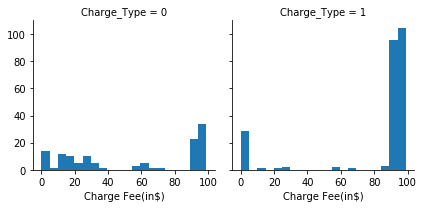

In [70]:
g = sns.FacetGrid(train, col='Charge_Type')
g.map(plt.hist, 'Charge Fee(in$)', bins=20)

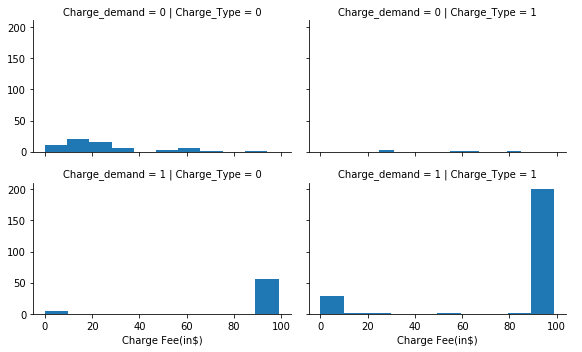

In [71]:
grid = sns.FacetGrid(train, col='Charge_Type', row='Charge_demand', height=2.5, aspect=1.6)
grid.map(plt.hist, 'Charge Fee(in$)',alpha=1, bins=10)
grid.add_legend();

In [72]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 14 columns):
Day                          365 non-null int64
No Of Sessions               365 non-null float64
Accumulated Sessions         365 non-null int64
Unique Drivers               365 non-null int64
No. of Ports                 365 non-null int64
Energy(kWh)                  365 non-null int64
Accumulated_Energy(MWh)      365 non-null float64
GHG_savings(kg)              365 non-null float64
Accumulated GHG (kg)         365 non-null int64
Charge time (minutes)        365 non-null int64
Gasoline_Savings(gallons)    365 non-null float64
Charge Fee(in$)              365 non-null int64
Charge_Type                  365 non-null int64
Charge_demand                365 non-null int64
dtypes: float64(4), int64(10)
memory usage: 40.0 KB


In [73]:
X = np.array(train.drop(['Charge_Type'], 1).astype(float))

In [74]:
y = np.array(train['Charge_Type'])

In [75]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 14 columns):
Day                          365 non-null int64
No Of Sessions               365 non-null float64
Accumulated Sessions         365 non-null int64
Unique Drivers               365 non-null int64
No. of Ports                 365 non-null int64
Energy(kWh)                  365 non-null int64
Accumulated_Energy(MWh)      365 non-null float64
GHG_savings(kg)              365 non-null float64
Accumulated GHG (kg)         365 non-null int64
Charge time (minutes)        365 non-null int64
Gasoline_Savings(gallons)    365 non-null float64
Charge Fee(in$)              365 non-null int64
Charge_Type                  365 non-null int64
Charge_demand                365 non-null int64
dtypes: float64(4), int64(10)
memory usage: 40.0 KB


In [76]:
kmeans = KMeans(n_clusters=2)

In [77]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [78]:
correct = 0
for i in range(len(X)):
    predict = np.array(X[i].astype(float))
    predict = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))

0.33424657534246577


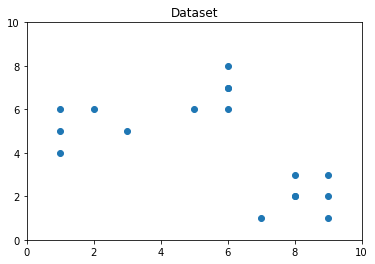

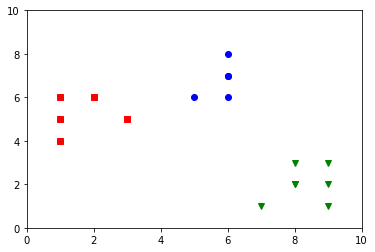

In [84]:
from sklearn.cluster import KMeans
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

x1 = np.array([3, 1, 1, 2, 1, 6, 6, 6, 5, 6, 7, 8, 9, 8, 9, 9, 8])
x2 = np.array([5, 4, 6, 6, 5, 8, 6, 7, 6, 7, 1, 2, 1, 2, 3, 2, 3])

plt.plot()
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.title('Dataset')
plt.scatter(x1, x2)
plt.show()

# create new plot and data
plt.plot()
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)
colors = ['b', 'g', 'r']
markers = ['o', 'v', 's']

# KMeans algorithm 
K = 3
kmeans_model = KMeans(n_clusters=K).fit(X)

plt.plot()
for i, l in enumerate(kmeans_model.labels_):
    plt.plot(x1[i], x2[i], color=colors[l], marker=markers[l],ls='None')
    plt.xlim([0, 10])
    plt.ylim([0, 10])

plt.show()

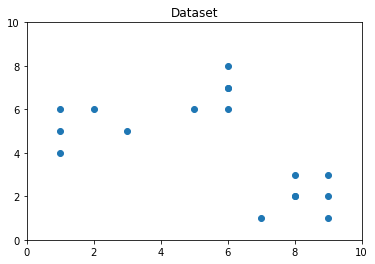

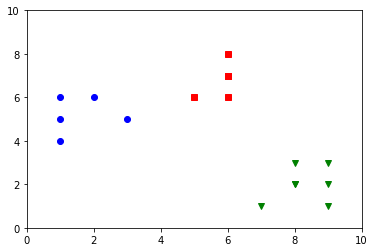

In [83]:
from sklearn.cluster import KMeans
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

x1 = np.array([3, 1, 1, 2, 1, 6, 6, 6, 5, 6, 7, 8, 9, 8, 9, 9, 8])
x2 = np.array([5, 4, 6, 6, 5, 8, 6, 7, 6, 7, 1, 2, 1, 2, 3, 2, 3])

plt.plot()
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.title('Dataset')
plt.scatter(x1, x2)
plt.show()

# create new plot and data
plt.plot()
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)
colors = ['b', 'g', 'r']
markers = ['o', 'v', 's']

# KMeans algorithm 
K = 3
kmeans_model = KMeans(n_clusters=K).fit(X)

plt.plot()
for i, l in enumerate(kmeans_model.labels_):
    plt.plot(x1[i], x2[i], color=colors[l], marker=markers[l],ls='None')
    plt.xlim([0, 10])
    plt.ylim([0, 10])

plt.show()